In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
import matplotlib
import seaborn as sns

font = {'size'   : 13}

matplotlib.rc('font', **font)

In [152]:
path = 'Machine_Experiments/exp2/Lyapunov_eq_van_der_pool_2d_train_True'
all_files = glob.glob(os.path.join(path, "*.csv"))
all_n_act = [pd.read_csv(f) for f in all_files]
df = pd.concat(all_n_act, axis=0)
df = df.replace({'<function cos at 0x7ff6552a7550>': 'cos'})
acts = df['activation'].unique()
df

,Unnamed: 0,all_loss_values,all_test_loss_values,activation,m,n,mse
0,0,83.510120,63.768703,tanh,200,90,20.116735
1,1,83.462715,63.731853,tanh,200,90,20.116735
2,2,83.412460,63.692764,tanh,200,90,20.116735
3,3,83.358740,63.651190,tanh,200,90,20.116735
4,4,83.301280,63.607014,tanh,200,90,20.116735
...,...,...,...,...,...,...,...
99995,99995,51.066006,40.542484,relu,200,90,46.862694
99996,99996,50.921440,40.541073,relu,200,90,46.862694
99997,99997,50.936990,40.540108,relu,200,90,46.862694
99998,99998,50.811924,40.543198,relu,200,90,46.862694


In [153]:
df_small = df.groupby(['activation', 'n']).last().reset_index()

In [154]:
print(df_small[['activation', 'all_loss_values', 'all_test_loss_values', 'mse']].round(decimals=3).to_latex())

\begin{tabular}{llrrr}
\toprule
{} & activation &  all\_loss\_values &  all\_test\_loss\_values &     mse \\
\midrule
0 &        cos &            0.913 &                 1.347 &   1.360 \\
1 &        elu &            0.008 &                 8.051 &   9.047 \\
2 &       relu &           50.838 &                40.542 &  46.863 \\
3 &       selu &            0.143 &                 4.805 &   5.956 \\
4 &       tanh &            0.083 &                17.241 &  20.117 \\
\bottomrule
\end{tabular}



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


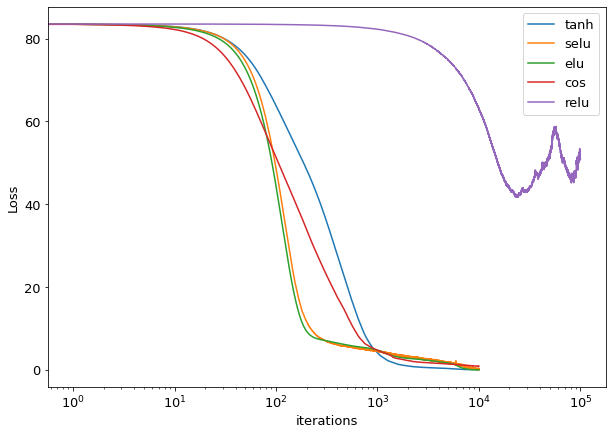

In [155]:
plt.figure(figsize=(10,7))
for act in acts:
    plt.plot(df[df['activation'] == act]['all_loss_values'], label = act)
plt.xscale('log')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Plots/multi_act.pdf')
plt.show()

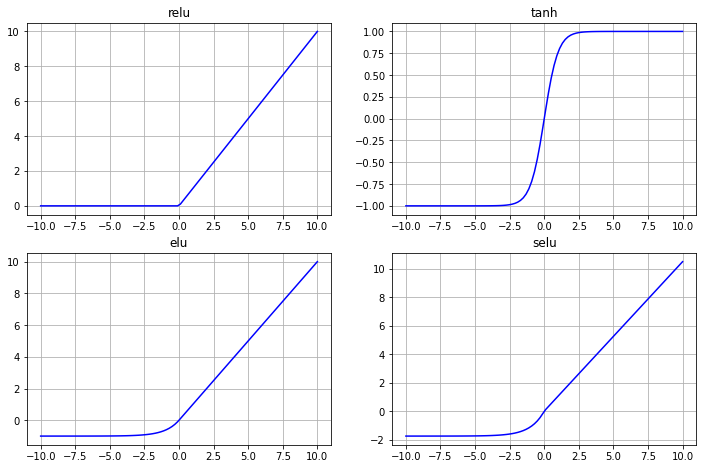

In [96]:
# Plot example activation functions
import tensorflow as tf

x = np.linspace(-10, 10, 100)
fig = plt.figure(figsize=(12, 12))
for i, activation in enumerate(['relu', 'tanh', 'elu', 'selu',]):
    row = (i % 2) + 1
    col = (i // 2) + 1
    fig.add_subplot(3, 2, i + 1)
    plt.grid()
    plt.title("{}".format(activation))
    plt.plot(x, getattr(tf.keras.activations, activation)(x), c='b')
plt.savefig('Plots/ill_act.pdf')
plt.show()

In [156]:
path = 'Machine_Experiments/exp2/Lyapunov_eq_van_der_pool_2d_train_False (1)'
all_files = glob.glob(os.path.join(path, "*.csv"))
all_n_act = [pd.read_csv(f) for f in all_files]
df = pd.concat(all_n_act, axis=0)
df

,Unnamed: 0,all_loss_values,all_test_loss_values,activation,m,n,mse
0,0,83.510120,50.081020,<function cos at 0x7f197fd86550>,5000,90,0.978378
1,1,70.363080,42.740170,<function cos at 0x7f197fd86550>,5000,90,0.978378
2,2,60.407840,36.943752,<function cos at 0x7f197fd86550>,5000,90,0.978378
3,3,52.637466,32.298462,<function cos at 0x7f197fd86550>,5000,90,0.978378
4,4,46.425850,28.527758,<function cos at 0x7f197fd86550>,5000,90,0.978378
...,...,...,...,...,...,...,...
9995,9995,5.844958,3.569188,<function cos at 0x7f197fd86550>,20,90,4.165223
9996,9996,5.844955,3.569195,<function cos at 0x7f197fd86550>,20,90,4.165223
9997,9997,5.844952,3.569203,<function cos at 0x7f197fd86550>,20,90,4.165223
9998,9998,5.844948,3.569211,<function cos at 0x7f197fd86550>,20,90,4.165223


In [157]:
all_ms = np.sort(df['m'].unique())

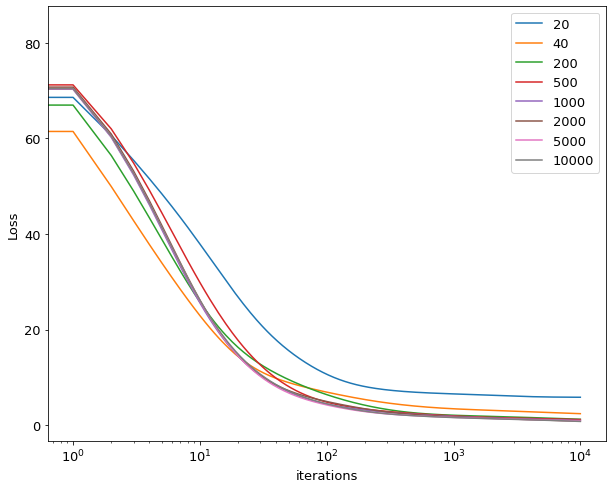

In [158]:
plt.figure(figsize=(10,8))
for m in all_ms:
    plt.plot(df[df['m'] == m]['all_loss_values'], label = m)
plt.xscale('log')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Plots/multi_ms.pdf')
plt.show()

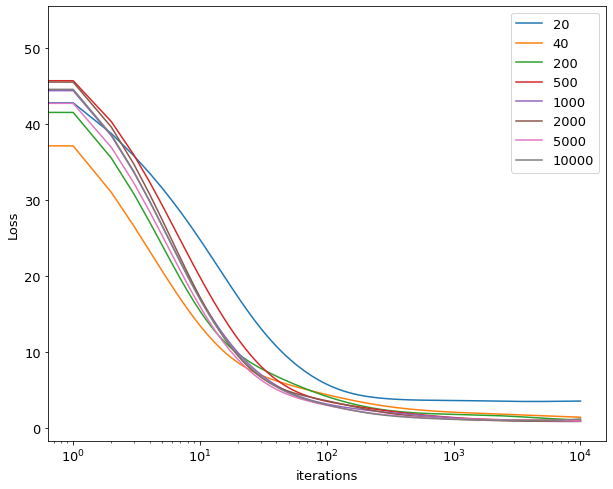

In [159]:
plt.figure(figsize=(10,8))
for m in all_ms:
    plt.plot(df[df['m'] == m]['all_test_loss_values'], label = m)
plt.xscale('log')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [160]:
df_small = df.groupby(['m']).last().reset_index()
print(df_small[['m', 'mse']].round(decimals=3).T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &       0 &       1 &        2 &        3 &         4 &         5 &         6 &          7 \\
\midrule
m   &  20.000 &  40.000 &  200.000 &  500.000 &  1000.000 &  2000.000 &  5000.000 &  10000.000 \\
mse &   4.165 &   1.625 &    1.112 &    1.054 &     0.965 &     0.938 &     0.978 &      1.346 \\
\bottomrule
\end{tabular}



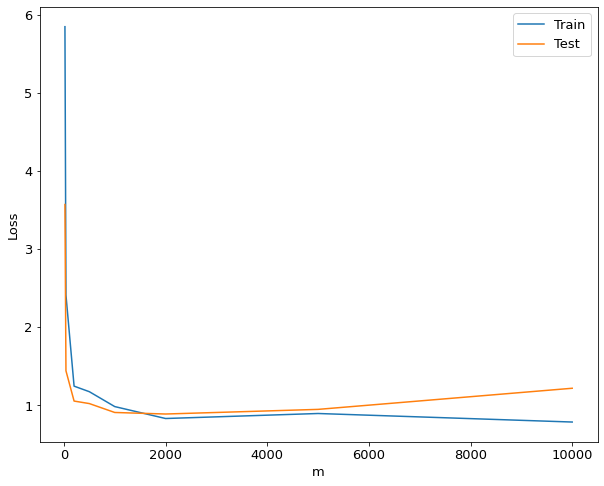

In [161]:
plt.figure(figsize=(10,8))
plt.plot(df_small['m'], df_small['all_loss_values'], label = 'Train')
plt.plot(df_small['m'], df_small['all_test_loss_values'], label = 'Test')
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.savefig('Plots/multi_m_test.pdf')
plt.show()

In [162]:
path = 'Machine_Experiments/exp2/Lyapunov_eq_van_der_pool_2d_train_True (2)'
all_files = glob.glob(os.path.join(path, "*.csv"))
all_n_act = [pd.read_csv(f) for f in all_files]
df = pd.concat(all_n_act, axis=0)
df = df.replace({'<function cos at 0x7fdd759a8550>': 'cos'})
acts = df['activation'].unique()
df

,Unnamed: 0,all_loss_values,all_test_loss_values,activation,m,n,mse
0,0,65.621750,60.597670,elu,200,3250,0.564299
1,1,65.574770,60.552690,elu,200,3250,0.564299
2,2,65.525720,60.504670,elu,200,3250,0.564299
3,3,65.474144,60.454330,elu,200,3250,0.564299
4,4,65.419840,60.401610,elu,200,3250,0.564299
...,...,...,...,...,...,...,...
9995,9995,0.083131,0.083796,tanh,200,3250,0.111183
9996,9996,0.083116,0.081992,tanh,200,3250,0.111183
9997,9997,0.083095,0.083659,tanh,200,3250,0.111183
9998,9998,0.083070,0.082063,tanh,200,3250,0.111183


In [163]:
ns =  np.sort(df['n'].unique())
acts = df['activation'].unique()

In [164]:
df_small = df.groupby(['activation', 'n']).last().reset_index()
df_small

,activation,n,Unnamed: 0,all_loss_values,all_test_loss_values,m,mse
0,cos,90,9999,0.034335,28.605734,200,28.370028
1,cos,300,9999,0.725756,0.428205,200,0.545927
2,cos,900,9999,0.635193,0.420441,200,0.621199
3,cos,1925,9999,0.391794,0.290612,200,0.465238
4,cos,3250,9999,0.366555,0.324719,200,0.471581
5,cos,4200,9999,0.319826,0.288946,200,0.433358
6,elu,90,9999,0.033662,8.530316,200,9.011909
7,elu,300,9999,0.883240,2.479215,200,2.579812
8,elu,900,9999,0.487111,0.478573,200,0.530494
9,elu,1925,9999,0.422532,0.376054,200,0.551323


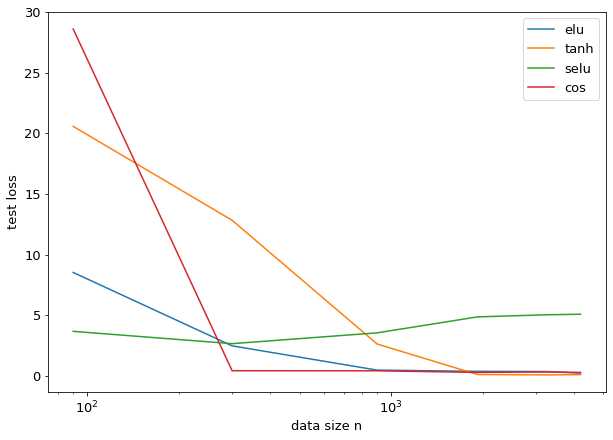

In [165]:
plt.figure(figsize=(10,7))
for act in ['elu', 'tanh', 'selu', 'cos']:
    # print(act)
    temp_df = df_small[df_small['activation'] == act]
    plt.plot(temp_df['n'], temp_df['all_test_loss_values'], label = act)

plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('data size n')
plt.ylabel('test loss')
plt.savefig('Plots/act_n.pdf')
plt.show()    

Text(0, 0.5, 'test loss')

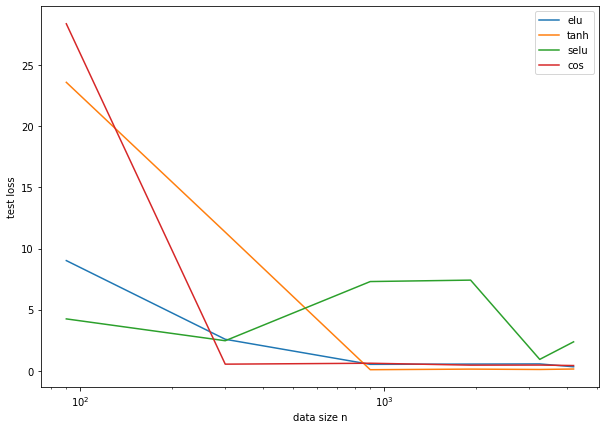

In [136]:
plt.figure(figsize=(10,7))
for act in ['elu', 'tanh', 'selu', 'cos']:
    # print(act)
    temp_df = df_small[df_small['activation'] == act]
    plt.plot(temp_df['n'], temp_df['mse'], label = act)

plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('data size n')
plt.ylabel('test loss')

In [9]:
path = 'Machine_Experiments/approx/approx_results.csv'
df = pd.read_csv(path)
df = df.drop(columns=['Unnamed: 0'])
df['S_err'] = np.power(np.square(df['mse_sindy_x1']) + np.square(df['mse_sindy_x2']), 0.5)
df['M_err'] = np.power(np.square(df['mse_mlp_x1']) + np.square(df['mse_mlp_x2']), 0.5)
df

,n,traj,mse_sindy_x1,mse_sindy_x2,mse_mlp_x1,mse_mlp_x2,time_S,time_M,S_err,M_err
0,2000,10,1.419333e-09,5.862895e-08,0.006611,1.233293,133.42,2.81,5.864612e-08,1.233311
1,2000,20,8.126921e-10,5.857332e-08,0.013415,0.620686,211.83,2.52,5.857896e-08,0.620831
2,2000,50,1.234853e-09,3.821751e-08,0.102647,0.989974,482.01,5.39,3.823746e-08,0.995282
3,2000,100,1.082172e-09,5.429018e-08,0.000870,0.021059,936.26,9.38,5.430097e-08,0.021077
4,2000,500,1.164224e-09,4.456454e+00,0.001021,0.011801,4336.10,48.51,4.456454e+00,0.011845
5,1000,10,1.045357e-06,6.090557e-06,0.054391,3.954603,37.32,1.51,6.179616e-06,3.954977
6,1000,20,7.624971e-08,2.575843e-06,0.085322,2.720452,54.99,1.75,2.576971e-06,2.721790
7,1000,50,2.421672e-08,7.740696e-07,0.020783,0.177905,260.69,3.94,7.744483e-07,0.179115
8,1000,100,1.974800e-08,8.049192e-07,0.034177,0.625990,470.06,5.93,8.051614e-07,0.626922
9,1000,500,1.965029e-08,7.023882e-07,0.004893,0.045991,2163.86,26.97,7.026630e-07,0.046251


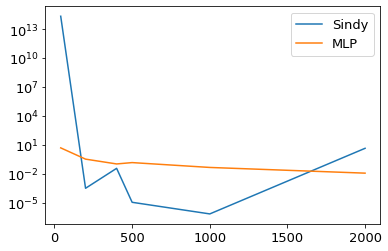

In [3]:
df_small = df[df['traj'] == 500]
plt.plot(df_small['n'], df_small['S_err'], label = 'Sindy')
plt.plot(df_small['n'], df_small['M_err'], label = 'MLP')
plt.yscale('log')
plt.legend()

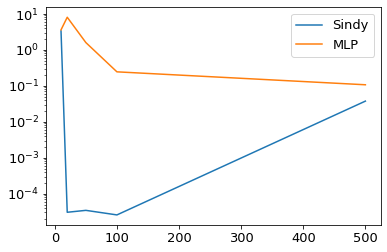

In [4]:
df_small = df[df['n'] == 400]
plt.plot(df_small['traj'], df_small['S_err'], label = 'Sindy')
plt.plot(df_small['traj'], df_small['M_err'], label = 'MLP')
plt.yscale('log')
plt.legend()

In [5]:

df['traj'].unique()

array([ 10,  20,  50, 100, 500])

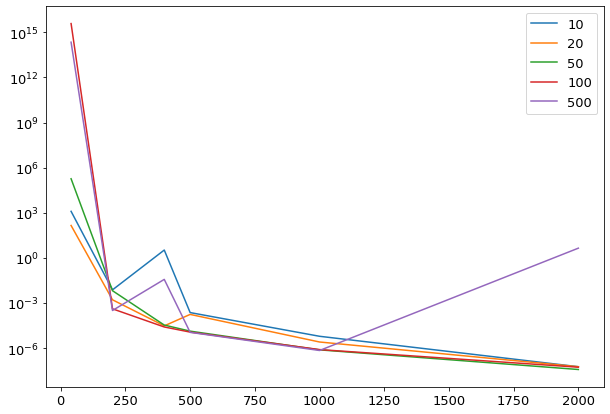

In [6]:
plt.figure(figsize=(10,7))
plt.yscale('log')
for i in df['traj'].unique():
    df_temp = df[df['traj'] == i]
    plt.plot(df_temp['n'], df_temp['S_err'], label = i)
plt.legend()

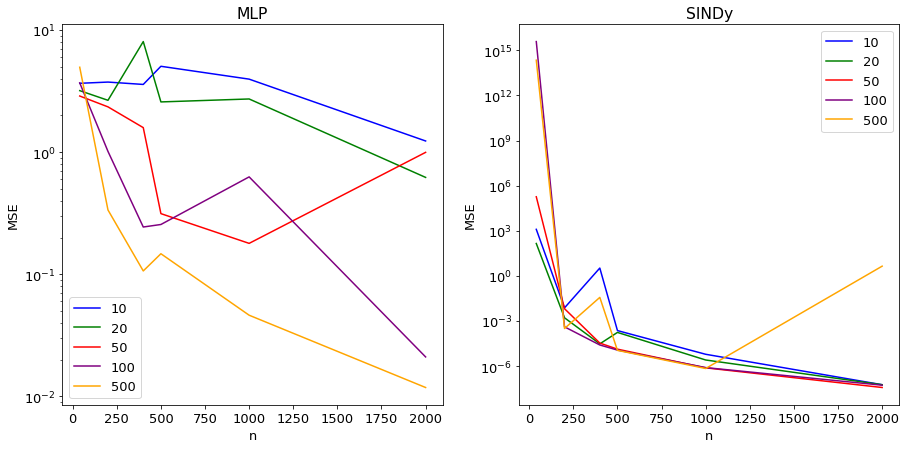

In [7]:
cols = ['blue', 'green', 'red', 'purple', 'orange']
plt.figure(figsize=(15,7))
plt.yscale('log')
for i, c in zip(df['traj'].unique(), cols):
    df_temp = df[df['traj'] == i]
    plt.subplot(121)
    plt.plot(df_temp['n'], df_temp['M_err'], label = i, c=c)
    plt.yscale('log')
    plt.ylabel('MSE')
    plt.xlabel('n')
    plt.title('MLP')
    plt.legend()
    plt.subplot(122)
    plt.plot(df_temp['n'], df_temp['S_err'], label = i, c=c)
    plt.yscale('log')
    plt.ylabel('MSE')
    plt.xlabel('n')
    plt.title('SINDy')
plt.legend()

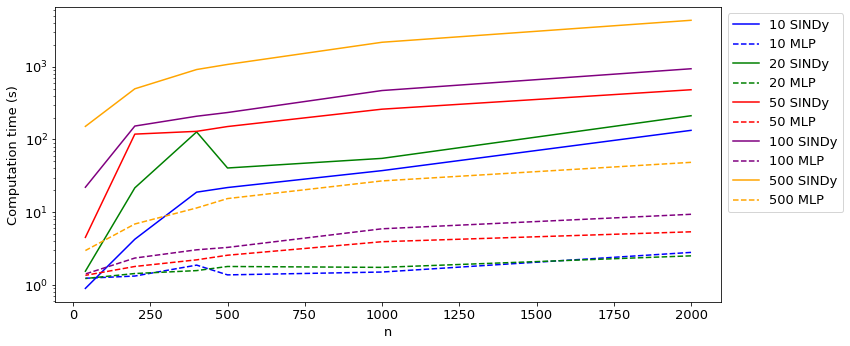

In [8]:
cols = ['blue', 'green', 'red', 'purple', 'orange']
plt.figure(figsize=(12,5))
for i, c in zip(df['traj'].unique(), cols):
    temp_df = df[df['traj'] == i]
    plt.plot(temp_df['n'], temp_df['time_S'], label = str(i) + ' SINDy', c=c)
    plt.plot(temp_df['n'], temp_df['time_M'], '--', label = str(i) + ' MLP',c=c)
plt.legend(ncol=1, bbox_to_anchor = (1, 1), fancybox=True)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Computation time (s)')
plt.tight_layout()

In [10]:
#new runs

In [11]:
path = 'Machine_Experiments/approx2/approx_results.csv'
df = pd.read_csv(path)
df = df.drop(columns=['Unnamed: 0'])
df['S_err'] = np.power(np.square(df['mse_sindy_x1']) + np.square(df['mse_sindy_x2']), 0.5)
df['M_err'] = np.power(np.square(df['mse_mlp_x1']) + np.square(df['mse_mlp_x2']), 0.5)
df

,n,traj,mse_sindy_x1,mse_sindy_x2,mse_mlp_x1,mse_mlp_x2,time_S,time_M,S_err,M_err
0,4000,10,9.170069e-11,2.418749e-09,0.008278,0.630380,86.86,6.64,2.420486e-09,0.630435
1,4000,20,5.781730e-11,3.603432e-09,0.001282,0.316959,222.13,6.74,3.603895e-09,0.316962
2,4000,50,6.963745e-11,3.115146e-09,0.001238,0.068288,828.13,10.40,3.115924e-09,0.068299
3,4000,100,7.139706e-11,4.233685e-05,0.002243,0.010375,1861.46,39.98,4.233685e-05,0.010615
4,4000,500,7.404799e-11,1.972758e-03,0.000178,0.004839,9518.93,161.04,1.972758e-03,0.004842
5,2000,10,2.464302e-08,3.133455e-07,0.006960,2.115083,62.37,4.26,3.143130e-07,2.115095
6,2000,20,1.110746e-09,5.276578e-08,0.001533,0.776074,226.42,8.37,5.277747e-08,0.776075
7,2000,50,1.041041e-09,4.689562e-08,0.002260,0.175711,258.20,16.57,4.690717e-08,0.175726
8,2000,100,1.139298e-09,4.242338e-08,0.001415,0.056117,924.08,28.98,4.243868e-08,0.056135
9,2000,500,1.086903e-09,7.287067e-05,0.002137,0.014013,4254.45,87.83,7.287067e-05,0.014175


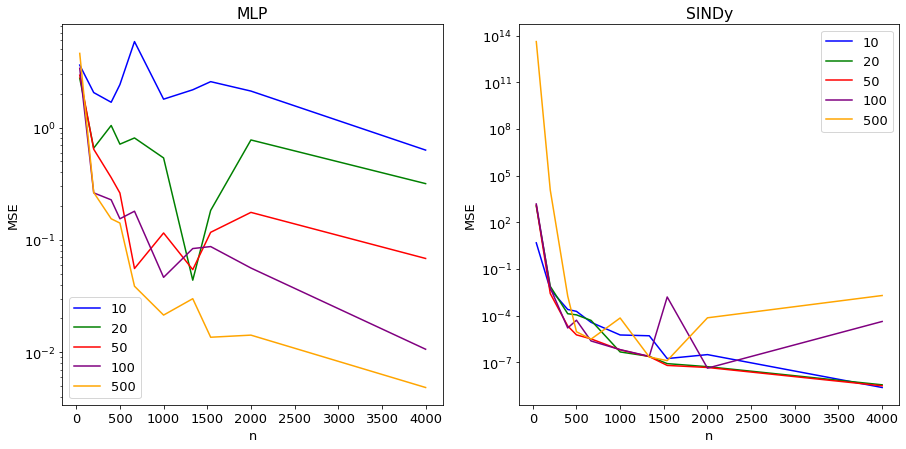

In [14]:
cols = ['blue', 'green', 'red', 'purple', 'orange']
plt.figure(figsize=(15,7))
plt.yscale('log')
for i, c in zip(df['traj'].unique(), cols):
    df_temp = df[df['traj'] == i]
    plt.subplot(121)
    plt.plot(df_temp['n'], df_temp['M_err'], label = i, c=c)
    plt.yscale('log')
    plt.ylabel('MSE')
    plt.xlabel('n')
    plt.title('MLP')
    plt.legend()
    plt.subplot(122)
    plt.plot(df_temp['n'], df_temp['S_err'], label = i, c=c)
    plt.yscale('log')
    plt.ylabel('MSE')
    plt.xlabel('n')
    plt.title('SINDy')
plt.legend()
plt.savefig('Plots/mlp_sindy_mse.pdf')
plt.show()

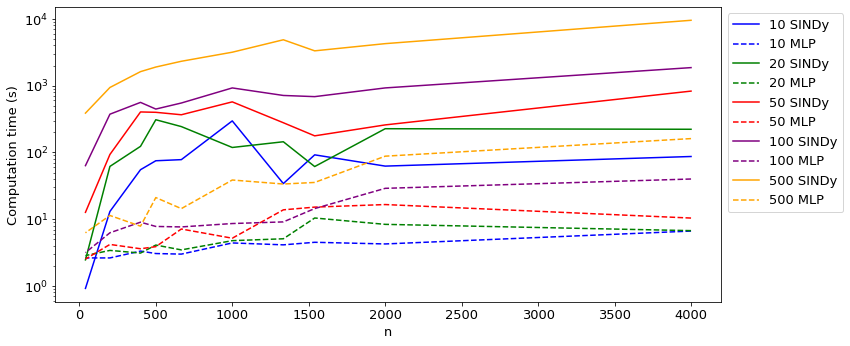

In [15]:
cols = ['blue', 'green', 'red', 'purple', 'orange']
plt.figure(figsize=(12,5))
for i, c in zip(df['traj'].unique(), cols):
    temp_df = df[df['traj'] == i]
    plt.plot(temp_df['n'], temp_df['time_S'], label = str(i) + ' SINDy', c=c)
    plt.plot(temp_df['n'], temp_df['time_M'], '--', label = str(i) + ' MLP',c=c)
plt.legend(ncol=1, bbox_to_anchor = (1, 1), fancybox=True)
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Computation time (s)')
plt.tight_layout()
plt.savefig('Plots/mlp_sindy_com.pdf')
plt.show()